In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data

In [37]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [38]:
IMAGE_SIZE = 28
NUM_PIXELS = IMAGE_SIZE * IMAGE_SIZE
NUM_CLASSES = 10

26052-th digit:


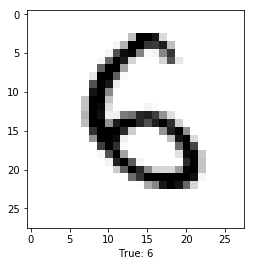

In [39]:
def plot_random():
    i = np.random.randint(X_train.shape[0])
    print("{0}-th digit:".format(i))
    plt.imshow(X_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='binary')
    plt.xlabel("True: {0}".format(y_train[i]))
    plt.show()
    
plot_random()

In [40]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = X_train / 255.
X_test = X_test / 255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories=[range(10)])
Y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
Y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

Y_train.shape

(60000, 10)

### Fit model

In [42]:
%autoreload

from src.model import Sequential
from src.layers.dense import Dense
from src.layers.activation import Activation
from src import activation_fns
from src.optimizers import Adam

model = Sequential()

model.add(Dense(20))
model.add(Activation(activation_fns.ReLU))
model.add(Dense(NUM_CLASSES))
model.add(Activation(activation_fns.softmax))

model.configure(X_train.shape, Adam(0.001))

In [43]:
costs = model.fit(X_train, Y_train, 10, batch_size=128)

### Accuracy

In [44]:
from sklearn.metrics import accuracy_score
decode = lambda x: np.argmax(x, axis=1)

y_train_pred = decode(model.predict(X_train))
print("Train:", accuracy_score(y_train, y_train_pred))
y_test_pred = decode(model.predict(X_test))
print("Test:", accuracy_score(y_test, y_test_pred))

Train: 0.9644
Test: 0.9551


In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[ 965,    0,    3,    1,    1,    3,    3,    3,    1,    0],
       [   0, 1113,    7,    3,    1,    1,    2,    1,    7,    0],
       [   6,    1,  980,   14,    6,    1,    4,   11,    9,    0],
       [   0,    0,    8,  978,    1,    8,    0,    8,    7,    0],
       [   0,    2,   10,    0,  943,    0,    8,    3,    2,   14],
       [   4,    2,    3,   33,    6,  814,   11,    6,   11,    2],
       [   8,    3,    1,    1,    6,    8,  928,    1,    2,    0],
       [   1,    6,   22,    5,    2,    0,    0,  981,    1,   10],
       [   7,    4,    4,   21,    8,    5,    4,    6,  913,    2],
       [   6,    5,    5,   10,   26,    4,    0,   12,    5,  936]])

2812-th digit:


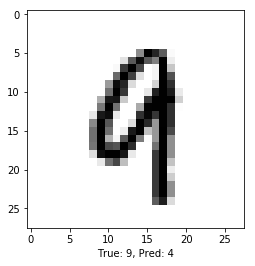

In [49]:
def plot_random_false():
    i = np.random.choice(np.where(y_test != y_test_pred)[0])
    print("{0}-th digit:".format(i))
    plt.imshow(X_test[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='binary')
    plt.xlabel("True: {0}, Pred: {1}".format(y_test[i], y_test_pred[i]))
    plt.show()
    
plot_random_false()

### Cost

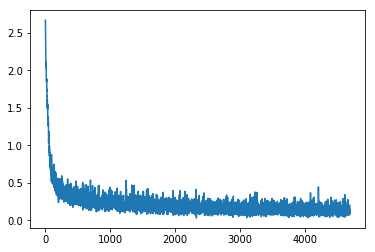

In [50]:
plt.plot(costs)
plt.show()

In [51]:
print("mean:   {0}".format(np.mean(costs)))
print("std:    {0}".format(np.std(costs)))
print("min:    {0}".format(np.min(costs)))
print("max:    {0}".format(np.max(costs)))
print("argmin: {0}".format(np.argmin(costs)))
print("argmax: {0}".format(np.argmax(costs)))

mean:   0.21919046354745975
std:    0.2001802434099723
min:    0.03354753052034758
max:    2.6687945350076907
argmin: 2326
argmax: 0
